In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

import missingno as miss

import seaborn as sns
import numpy as np
# import statsmodels.tsa.api as tsa

import datetime as dt
pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

In [2]:
def plot_dates(ts,figsize=(12,4),xtick_fontsize='large', xtick_fontweight='bold',
               title= None):## Make the fig and axis first
    
    if title is None:
        title = ts.name
    # plot the time series with pandas
    fig, ax = plt.subplots(figsize=figsize)
    ts.plot(ax=ax,title=title);
    
    ## creating our tick locators and formatters
    ## for minor month ticks
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontsize=xtick_fontsize, 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distinct
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax

In [3]:
## How to make a markdown table from a csv
df = pd.read_csv('Data/london_weather_MODIFIED.csv')
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
3,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
4,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
15337,20201228,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
15338,20201229,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN
15339,20201230,6.00,0.40,22.00,5.60,2.70,-0.10,0.00,"100,200.00",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [5]:
## Make a datetime index using pd.to_datetime
df['Datetime'] = pd.to_datetime(df['date'], format='%Y%m%d')
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,Datetime
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00,1979-01-01
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00,1979-01-02
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00,1979-01-03
3,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00,1979-01-04
4,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00,1979-01-05
...,...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN,2020-12-27
15337,20201228,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN,2020-12-28
15338,20201229,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN,2020-12-29
15339,20201230,6.00,0.40,22.00,5.60,2.70,-0.10,0.00,"100,200.00",NaN,2020-12-30


In [6]:
## Setting the datetime index
df_ts = df.set_index("Datetime")
df_ts

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
Datetime,,,,,,,,,,
1979-01-01,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1979-01-02,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
1979-01-03,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
1979-01-04,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
1979-01-05,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,20201227,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
2020-12-28,20201228,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
2020-12-29,20201229,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN


In [7]:

df_ts = df_ts.loc['2000':]


In [8]:
df_ts = df_ts[[ 'precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]
df_ts

,precipitation,mean_temp,min_temp,max_temp,snow_depth
Datetime,,,,,
2000-01-01,0.00,7.00,4.90,10.80,0.00
2000-01-02,0.20,7.90,5.00,11.50,0.00
2000-01-03,6.00,9.40,7.20,9.50,0.00
2000-01-04,0.20,7.00,4.40,11.00,0.00
2000-01-05,0.80,6.40,1.90,10.80,0.00
...,...,...,...,...,...
2020-12-27,2.00,7.50,7.60,7.50,NaN
2020-12-28,0.20,1.10,-1.30,3.60,NaN
2020-12-29,0.00,2.60,1.10,4.10,NaN


In [9]:
df_ts.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [10]:
## interpolating temperature measures
df_ts['mean_temp'] = df_ts['mean_temp'].interpolate()
df_ts['max_temp'] = df_ts['max_temp'].interpolate()
df_ts['min_temp'] = df_ts['min_temp'].interpolate()

df_ts['snow_depth'] = df_ts['snow_depth'].fillna(0)
df_ts['precipitation'] = df_ts['precipitation'].fillna(0)

In [11]:
df_ts.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

### Q1: What month had the most precipitation between 2000 through 2010?

In [12]:
agg_specs = {"mean_temp":"mean","min_temp":"min",'max_temp':'max',
             'precipitation':'sum', 'snow_depth':'sum'}

In [13]:
weather_m =df_ts.resample("m").agg(agg_specs)
weather_m = df_ts.loc['2000':'2010']
weather_m

,precipitation,mean_temp,min_temp,max_temp,snow_depth
Datetime,,,,,
2000-01-01,0.00,7.00,4.90,10.80,0.00
2000-01-02,0.20,7.90,5.00,11.50,0.00
2000-01-03,6.00,9.40,7.20,9.50,0.00
2000-01-04,0.20,7.00,4.40,11.00,0.00
2000-01-05,0.80,6.40,1.90,10.80,0.00
...,...,...,...,...,...
2010-12-27,5.00,0.20,-4.60,8.00,1.00
2010-12-28,0.40,5.30,2.50,9.50,0.00
2010-12-29,1.40,6.80,4.10,7.70,0.00


In [14]:
date_max = weather_m['precipitation'].idxmax
date_max

<bound method Series.idxmax of Datetime
2000-01-01   0.00
2000-01-02   0.20
2000-01-03   6.00
2000-01-04   0.20
2000-01-05   0.80
             ... 
2010-12-27   5.00
2010-12-28   0.40
2010-12-29   1.40
2010-12-30   0.00
2010-12-31   0.00
Name: precipitation, Length: 4018, dtype: float64>

In [15]:
max_precip = weather_m['precipitation'].max()
max_precip

36.6

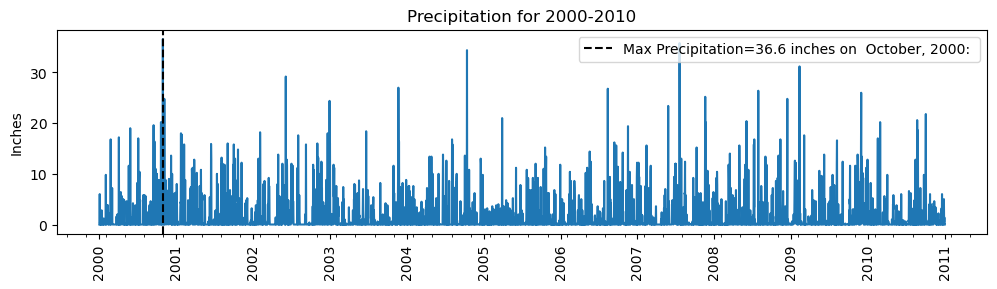

In [16]:
## Visualization WITH tick formatters (MUST NOT USE PANDAS)
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(weather_m['precipitation'])
ax.set(title="Precipitation for 2000-2010", ylabel='Inches')


# customize major ticks 
major_loc =  mdates.YearLocator()
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# # customize maxor ticks
maxor_loc =  mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(maxor_loc)



## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='major',ha='center',rotation=90)
## Annotate max
date_max = weather_m['precipitation'].idxmax()
max_precip = weather_m['precipitation'].max()

label_txt = f"Max Precipitation={max_precip} inches on  {date_max.strftime('%B, %Y')}: "
ax.axvline(date_max,color='k',ls='--', label= label_txt)
ax.legend()

### Q2: Which year between 2000-2020 had the coolest average temperature?

In [17]:
weather_y =df_ts.resample("AS").agg(agg_specs)
weather_y = df_ts.loc['2000':'2020']
weather_y

,precipitation,mean_temp,min_temp,max_temp,snow_depth
Datetime,,,,,
2000-01-01,0.00,7.00,4.90,10.80,0.00
2000-01-02,0.20,7.90,5.00,11.50,0.00
2000-01-03,6.00,9.40,7.20,9.50,0.00
2000-01-04,0.20,7.00,4.40,11.00,0.00
2000-01-05,0.80,6.40,1.90,10.80,0.00
...,...,...,...,...,...
2020-12-27,2.00,7.50,7.60,7.50,0.00
2020-12-28,0.20,1.10,-1.30,3.60,0.00
2020-12-29,0.00,2.60,1.10,4.10,0.00


In [18]:
date_max = weather_y['min_temp'].idxmax
date_max

<bound method Series.idxmax of Datetime
2000-01-01    4.90
2000-01-02    5.00
2000-01-03    7.20
2000-01-04    4.40
2000-01-05    1.90
              ... 
2020-12-27    7.60
2020-12-28   -1.30
2020-12-29    1.10
2020-12-30   -0.10
2020-12-31   -3.10
Name: min_temp, Length: 7671, dtype: float64>

In [24]:
min_temp_y = weather_y['min_temp'].max()
min_temp_y

22.3

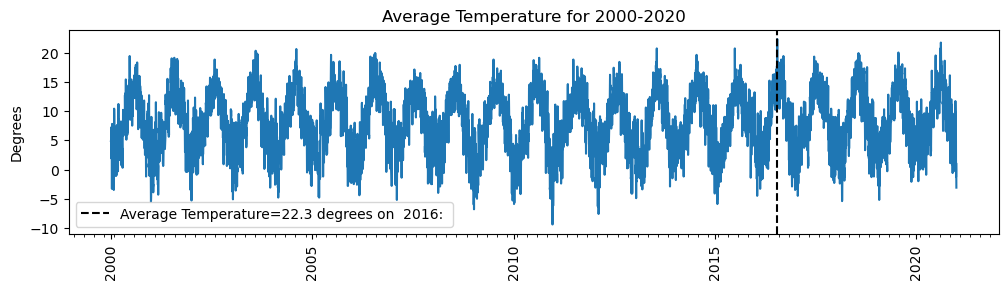

In [26]:
## Visualization WITH tick formatters (MUST NOT USE PANDAS)
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(weather_y['min_temp'])
ax.set(title="Average Temperature for 2000-2020", ylabel='Degrees')


# customize major ticks 
major_loc =  mdates.YearLocator(5)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# # customize maxor ticks
maxor_loc =  mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(maxor_loc)



## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='major',ha='center',rotation=90)
## Annotate max
date_max = weather_y['min_temp'].idxmax()
min_temp_y = weather_y['min_temp'].max()

label_txt = f"Average Temperature={min_temp_y} degrees on  {date_max.strftime('%Y')}: "
ax.axvline(date_max,color='k',ls='--', label= label_txt)
ax.legend()